<a href="https://colab.research.google.com/github/Dashnyam7/DIC_assignment/blob/main/K_mean_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Problem 1] Determine the initial value of the center point

In [32]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [33]:
import numpy as np
n_clusters = 4
myu = X[np.random.choice(len(X),size=n_clusters,replace=False)]
print(myu)

[[-1.84482705  3.25609891]
 [-0.69842598  8.16309188]
 [ 0.72086751  3.71347124]
 [ 1.72330962  4.2012082 ]]


# [Problem 2] Create a function to find SSE

In [34]:
def calc_sse(X):
        sse = 0
        best_sse = 10**20
        for i in range(len(X)):
            for j in range(n_clusters):
                if j == X[i,-1]:
                    sse += np.sum((X[i,:-1]-myu[j])**2)
        if best_sse > sse:
           best_sse = sse
           record_myu = myu
           record_cluster = n_clusters
        return best_sse

In [35]:
calc_sse(X)

0

# [Problem 3] Allocation to a cluster

In [36]:
def _update_cluster(X):
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(n_clusters):
                dist = np.sqrt(np.sum((X[i,:-1]-myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    X[i,-1] = j

# [Question 4] Moving the center point

In [37]:
def _update_myu(X):
        for j in range(n_clusters):
            myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)

# [Question 5] Repetition

In [38]:
def fit(self, X):
    for i in range(self.n_init):
        self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
        cluster = np.zeros(len(X))
        X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
        for j in range(self.n_iter):
            self.calc_sse(X_cluster)
            self._update_cluster(X_cluster)
            self._update_myu(X_cluster)
            if self.verbose:
                print("Initialization: %s Learning times: %s Best SSE: %s"%(i,j,self.best_sse))

# [Question 6] Calculation with different initial values

In [39]:
def __init__(self, n_clusters=2,n_init=20,n_iter=100,verbose=False):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

# [Question 7] Presumption

In [40]:
class ScratchKMeans():
    """
    Scratch implementation of K-means

    Parameters
    ----------
    n_clusters : int
      number of clusters
    n_init : int
      how many times to change the initial value of the center point
    max_iter : int
      Maximum number of iterations per calculation
    tol : float
      center point and centroid tolerance to stop the iteration
    verbose : bool
      True to print the learning process
    """
    def __init__(self, n_clusters=2,n_init=20,n_iter=100,verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

    def calc_sse(self,X):
            sse = 0
            for i in range(len(X)):
                for j in range(self.n_clusters):
                    if j == X[i,-1]:
                        sse += np.sum((X[i,:-1]-self.myu[j])**2)
            if self.best_sse > sse:
                self.best_sse = sse
                self.record_myu = self.myu
                self.record_cluster = self.n_clusters

    def _update_cluster(self,X):
            for i in range(len(X)):
                dist_m = 10**20
                for j in range(self.n_clusters):
                    dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                    if dist < dist_m:
                        dist_m = dist
                        X[i,-1] = j          

    def _update_myu(self,X):
            for j in range(self.n_clusters):
                self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)    



    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        """
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("Initialization: %s Learning times: %s Best SSE: %s"%(i,j,self.best_sse))

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [42]:
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

In [43]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=True)
clf.fit(X_train)

Initialization: 0 Learning times: 0 Best SSE: 954.6819165398905
Initialization: 0 Learning times: 1 Best SSE: 159.9926819889852
Initialization: 0 Learning times: 2 Best SSE: 130.86167505516
Initialization: 0 Learning times: 3 Best SSE: 75.89835493063322
Initialization: 0 Learning times: 4 Best SSE: 40.88676766442065
Initialization: 0 Learning times: 5 Best SSE: 39.55222577833133
Initialization: 0 Learning times: 6 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 7 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 8 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 9 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 10 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 11 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 12 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 13 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 14 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 15 

In [44]:
pred = clf.predict(X_train)
pred

array([3., 1., 2., 2., 0., 1., 3., 0., 0., 0., 0., 1., 1., 3., 3., 1., 2.,
       2., 2., 2., 1., 0., 2., 1., 1., 0., 1., 3., 2., 2., 3., 2., 3., 2.,
       1., 3., 1., 0., 3., 3., 1., 3., 3., 2., 0., 0., 3., 0., 1., 3., 2.,
       2., 2., 3., 0., 3., 0., 1., 2., 2., 1., 3., 2., 1., 1., 0., 0., 2.,
       3., 2., 3., 0., 3., 1., 1., 2., 3., 3., 0., 1.])

# [Problem 8] Implementation of elbow method

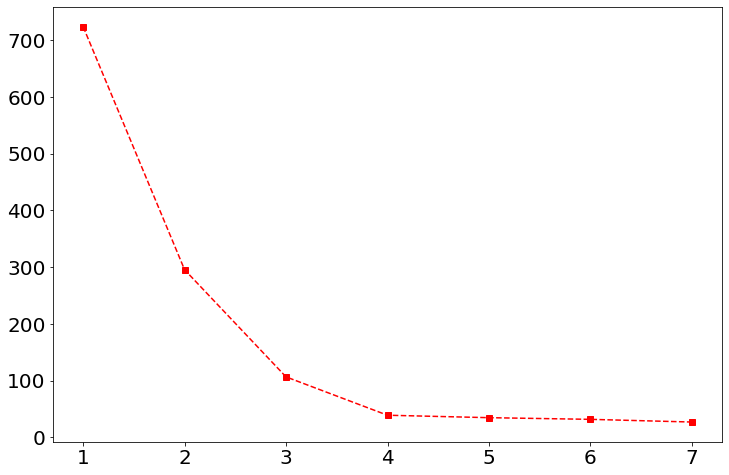

In [45]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X_train)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

# [Question 9] (Advanced task) Silhouette diagram

In [46]:
from matplotlib import cm
silhouette_vals = 
silhouette_avg = 
y_km = 
cluster_labels = 
n_clusters = 4
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

SyntaxError: ignored

# [Problem 10] Selecting the number of clusters k

In [49]:
data = pd.read_csv('Wholesale customers data.csv')
X = data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].values

In [50]:
#X = data[['Channel','Region']].values
#X

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(X)
data_pca = pca.transform(X)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


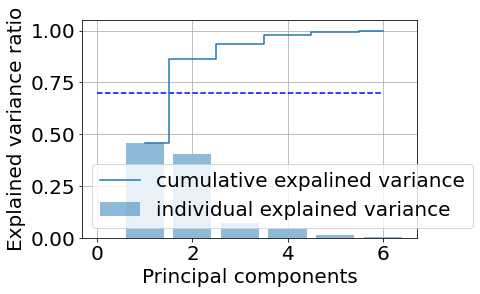

In [52]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [47]:
clf.fit(X)


Initialization: 0 Learning times: 0 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 1 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 2 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 3 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 4 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 5 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 6 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 7 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 8 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 9 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 10 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 11 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 12 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 13 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 14 Best SSE: 39.09836530776929
Initialization: 0 Learning times: 1

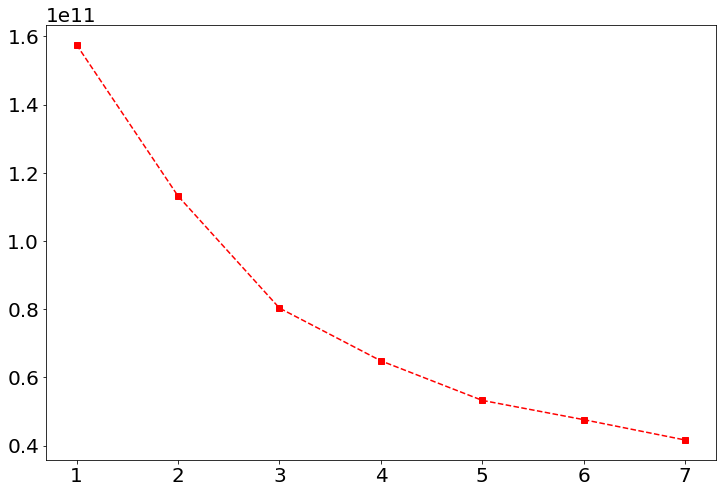

In [53]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--');

Let's say that the purpose of this analysis is to "analyze customer information, understand the characteristics of good customers and customers, and utilize them in the development of future measures." Then, if you divide into too many clusters, you will not have enough manpower and you will not be able to deploy beneficial measures.

Therefore, we decide to perform the analysis with 4 clusters this time.

# [Problem 11] Comparison with known groups

In [54]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=False)
clf.fit(X)
pred = clf.predict(X)
summary_df = pd.DataFrame({'pred':pred,'Region':data['Region'],'Channel':data['Channel'],})

Comparison with Region Let's output the predicted value/the number of data for each Region.

In [55]:
pd.pivot_table(summary_df, index='Region', columns='pred',values='Channel', aggfunc=len)

pred,0.0,1.0,2.0,3.0
Region,,,,
1,49,2,16,10
2,30,1,12,4
3,197,8,67,44


Considering this result Region==3, many are classified into cluster 3 (pred3.0), Regionbut it can be said that others do not seem to have much influence on cluster determination. It can be said that there is a difference in the trend of the data due to Regionthe difference from this.

Comparison with Channel Let's output the predicted value/the number of data for each channel.

In [56]:
pd.pivot_table(summary_df, index='Channel', columns='pred',values='Region', aggfunc=len)


pred,0.0,1.0,2.0,3.0
Channel,,,,
1,234,1,13,50
2,42,10,82,8


Considering the results, it can be said that many Chnnel==1are classified into cluster 3 (pred3.0), and many are classified into Chnnel==2cluster 1 (pred2.0). From this, it Channelcan be said that there is a difference in the tendency of the data depending on the difference.

# [Question 12] Useful information for wholesalers

In [57]:
data['cluster'] = pred

In [58]:
data.groupby('cluster').agg(['mean'])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,
0.0,1.152174,2.536232,9087.463768,3027.427536,3753.514493,2817.985507,1003.003623,1040.525362
1.0,1.909091,2.545455,19888.272727,36142.363636,45517.454545,6328.909091,21417.090909,8414.000000
2.0,1.863158,2.536842,4808.842105,10525.010526,16909.789474,1462.589474,7302.400000,1650.884211
3.0,1.137931,2.586207,36144.482759,5471.465517,6128.793103,6298.655172,1064.000000,2316.724138
